In [1]:
# import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import root_mean_squared_error
from sklearn.inspection import PartialDependenceDisplay

In [2]:
# import the data and  drop no longer needed columns 
video_df = pd.read_csv("data/videos_prepared.csv")

remove_columns = ["video_id", "title", "channel_title"]
video_df.drop(columns=remove_columns, inplace=True)
video_df.head()

,caption,hour_published,weekday_published,month_published,hd,cat_Comedy,cat_Education,cat_Entertainment,cat_Film & Animation,cat_Gaming,...,term_year,term_years,term_youtu,term_youtube,log_view_count,log_channel_view_count,log_channel_sub_count,log_channel_video_count,log_duration_seconds,cbrt_description_length
0,0,0,6,11,1,0,0,0,0,0,...,0.0,0.000000,0.0,0.243155,7.828038,11.927885,7.384610,5.752573,3.555348,9.976612
1,0,20,4,4,1,0,0,0,0,0,...,0.0,0.237726,0.0,0.063338,7.350516,12.850665,8.366603,5.389072,8.147288,11.965177
2,0,18,3,10,0,0,0,0,0,0,...,0.0,0.000000,0.0,0.000000,7.446001,14.875077,8.767329,6.741701,3.951244,13.871269
3,0,19,0,11,1,0,0,0,0,0,...,0.0,0.000000,0.0,0.000000,5.937536,10.890628,6.786717,4.867534,4.955827,5.325074
4,1,20,2,10,1,0,0,0,0,0,...,0.0,0.000000,0.0,0.000000,12.229037,17.917472,13.030250,5.940171,6.678342,6.431228


In [3]:
# import the data and  drop no longer needed columns 
video_df = pd.read_csv("data/videos_prepared.csv")

remove_columns = ["video_id", "title", "channel_title"]
video_df.drop(columns=remove_columns, inplace=True)
video_df.head()

,caption,hour_published,weekday_published,month_published,hd,cat_Comedy,cat_Education,cat_Entertainment,cat_Film & Animation,cat_Gaming,...,term_year,term_years,term_youtu,term_youtube,log_view_count,log_channel_view_count,log_channel_sub_count,log_channel_video_count,log_duration_seconds,cbrt_description_length
0,0,0,6,11,1,0,0,0,0,0,...,0.0,0.000000,0.0,0.243155,7.828038,11.927885,7.384610,5.752573,3.555348,9.976612
1,0,20,4,4,1,0,0,0,0,0,...,0.0,0.237726,0.0,0.063338,7.350516,12.850665,8.366603,5.389072,8.147288,11.965177
2,0,18,3,10,0,0,0,0,0,0,...,0.0,0.000000,0.0,0.000000,7.446001,14.875077,8.767329,6.741701,3.951244,13.871269
3,0,19,0,11,1,0,0,0,0,0,...,0.0,0.000000,0.0,0.000000,5.937536,10.890628,6.786717,4.867534,4.955827,5.325074
4,1,20,2,10,1,0,0,0,0,0,...,0.0,0.000000,0.0,0.000000,12.229037,17.917472,13.030250,5.940171,6.678342,6.431228


In [4]:
# split into features and target variable

X = video_df.drop(columns="log_view_count")
y = video_df["log_view_count"]

# split into training and test data
SEED = 666
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
X_train.head()

,caption,hour_published,weekday_published,month_published,hd,cat_Comedy,cat_Education,cat_Entertainment,cat_Film & Animation,cat_Gaming,...,term_www,term_year,term_years,term_youtu,term_youtube,log_channel_view_count,log_channel_sub_count,log_channel_video_count,log_duration_seconds,cbrt_description_length
691,0,19,1,4,1,0,1,0,0,0,...,0.192941,0.0,0.0,0.129062,0.000000,17.608917,12.055256,7.196687,7.220374,9.505998
453,0,7,5,2,1,0,0,0,0,0,...,0.087819,0.0,0.0,0.000000,0.000000,10.013642,5.420535,4.488636,8.782169,8.391942
451,0,11,1,7,1,0,0,0,0,0,...,0.000000,0.0,0.0,0.000000,0.000000,16.309203,10.214679,5.375278,3.178054,3.141381
67,0,20,2,9,1,0,0,1,0,0,...,0.196466,0.0,0.0,0.000000,0.090057,17.445774,12.641100,7.347300,5.463832,7.453040
311,0,17,3,2,1,0,0,0,0,0,...,0.155924,0.0,0.0,0.032594,0.053605,18.167549,13.355063,7.236339,7.712444,13.838275


In [5]:
# hyperparameter tune a decision tree regressor
SEED = 666
params = {"decisiontreeregressor__max_depth": [3, 5, 10, 15, 20, 30, None], "decisiontreeregressor__min_samples_leaf": [2, 4, 6], "decisiontreeregressor__min_samples_split": [2, 5, 10]}
pipeline = make_pipeline(StandardScaler(), DecisionTreeRegressor(random_state=SEED))
grid_search = GridSearchCV(pipeline, param_grid=params, cv=10, scoring="r2", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f"best score: {grid_search.best_score_}, best params: {best_params}")

best score: 0.5861119059685386, best params: {'decisiontreeregressor__max_depth': 5, 'decisiontreeregressor__min_samples_leaf': 4, 'decisiontreeregressor__min_samples_split': 10}


In [6]:
# fit decision tree with optimal parameters
dt = DecisionTreeRegressor(max_depth=best_params["decisiontreeregressor__max_depth"], min_samples_leaf=best_params["decisiontreeregressor__min_samples_leaf"], min_samples_split=best_params["decisiontreeregressor__min_samples_split"], random_state=SEED)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = dt.score(X_test, y_test)
print(f"r2: {r2}, rmse: {rmse}")

r2: 0.6336634600979427, rmse: 1.5892726455430004


In [7]:
# instantiate random forest and use randomized cross validation to search wide range of hyperparameters
params = {"randomforestregressor__n_estimators": [100, 200, 300, 500, 1000], "randomforestregressor__max_depth": [10, 20, 30, 50, None], "randomforestregressor__min_samples_leaf": [2, 4, 6],
          "randomforestregressor__max_features": ["sqrt", "log2", None], "randomforestregressor__bootstrap": [True, False]}
pipeline = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=SEED))
rand_search = RandomizedSearchCV(pipeline, param_distributions=params, cv=10, n_iter=50, scoring="r2", n_jobs=-1, random_state=SEED)
rand_search.fit(X_train, y_train)
best_params = rand_search.best_params_
print(f"best score: {rand_search.best_score_}, best params: {best_params}")

best score: 0.7045722628183057, best params: {'randomforestregressor__n_estimators': 500, 'randomforestregressor__min_samples_leaf': 2, 'randomforestregressor__max_features': None, 'randomforestregressor__max_depth': None, 'randomforestregressor__bootstrap': True}


In [8]:
# use gridsearch for fine-tuning hyperparameters
params = {"randomforestregressor__n_estimators": np.arange(best_params["randomforestregressor__n_estimators"] - 20, best_params["randomforestregressor__n_estimators"] + 30, 10), "randomforestregressor__max_depth": [best_params["randomforestregressor__max_depth"]],
          "randomforestregressor__min_samples_leaf": [best_params["randomforestregressor__min_samples_leaf"]], "randomforestregressor__max_features": [best_params["randomforestregressor__max_features"]],
          "randomforestregressor__bootstrap": [best_params["randomforestregressor__bootstrap"]]}
pipeline = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=SEED))
grid_search = GridSearchCV(pipeline, param_grid=params, cv=10, scoring="r2", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f"best score: {grid_search.best_score_}, best params: {best_params}")

best score: 0.7046075328053846, best params: {'randomforestregressor__bootstrap': True, 'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': None, 'randomforestregressor__min_samples_leaf': 2, 'randomforestregressor__n_estimators': np.int64(480)}


In [9]:
# fit random forest with optimal parameters
pipeline = make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=best_params["randomforestregressor__n_estimators"], max_depth=best_params["randomforestregressor__max_depth"], min_samples_leaf=best_params["randomforestregressor__min_samples_leaf"],
                           max_features=best_params["randomforestregressor__max_features"], bootstrap=best_params["randomforestregressor__bootstrap"], random_state=SEED))
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = pipeline.score(X_test, y_test)
rf = pipeline.named_steps["randomforestregressor"]
print(f"r2: {r2}, rmse: {rmse}")

r2: 0.7251901731763469, rmse: 1.3764943022964886


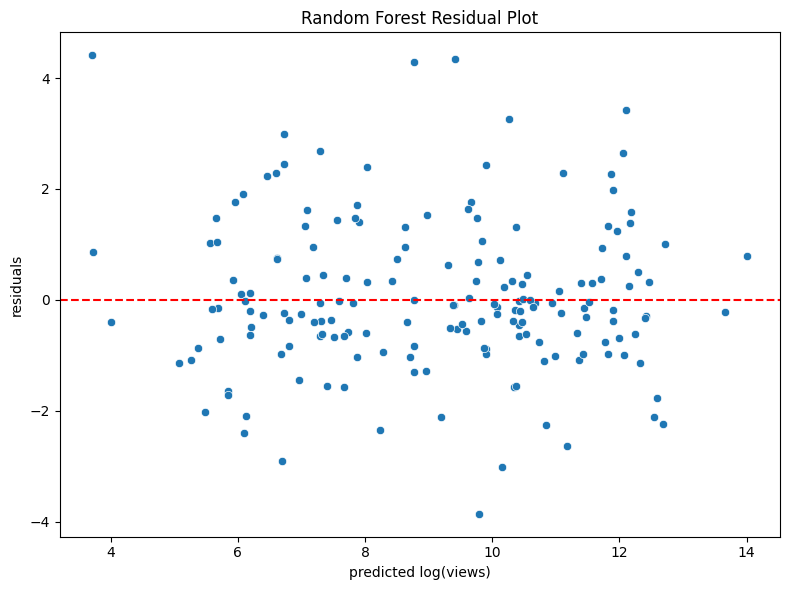

In [10]:
# visualize residuals to look for patterns
residuals = y_test - y_pred
plt.subplots(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("predicted log(views)")
plt.ylabel("residuals")
plt.title("Random Forest Residual Plot")
plt.tight_layout()

# save png
plt.savefig("images/rf_residual_plot.png", dpi=300)

In [11]:
# list top model feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
top_features = feature_importances.head(20)
top_features

log_channel_sub_count      0.563807
log_channel_video_count    0.082509
log_channel_view_count     0.069801
log_duration_seconds       0.019499
term_outreach              0.011861
tag_count                  0.011472
cbrt_description_length    0.011122
term_music                 0.010041
term_animal                0.010040
hour_published             0.009428
title_length               0.009357
term_vegan                 0.007994
term_animals               0.006641
month_published            0.005364
term_liberation            0.004716
term_instagram             0.004552
term_veganism              0.004465
weekday_published          0.004341
term_www                   0.003916
term_com                   0.003910
dtype: float64

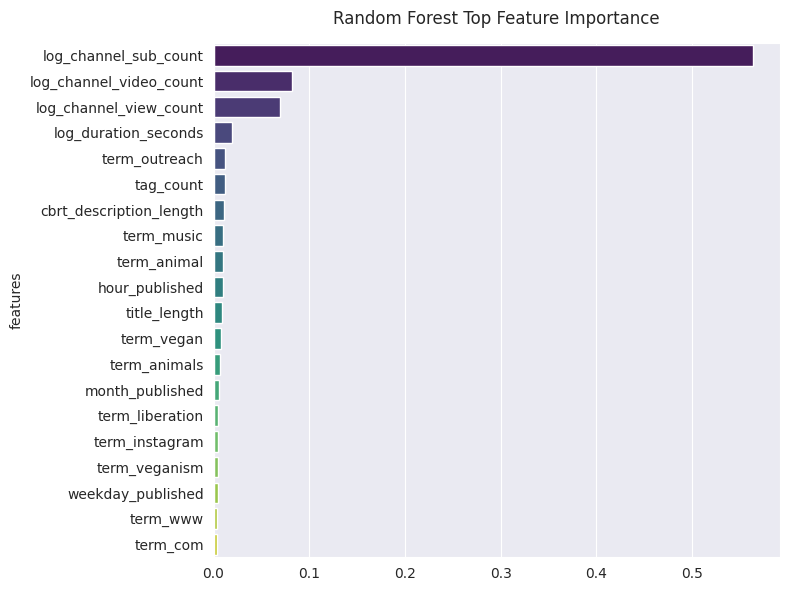

In [12]:
# visualize top 10 important features
sns.set_style("darkgrid")
plt.subplots(figsize=(8, 6))
sns.barplot(x=top_features.values, y=top_features.index, hue=top_features.index, palette="viridis", legend=False, orient="h")
plt.title("Random Forest Top Feature Importance", y=1.02)
plt.ylabel("features")
plt.tight_layout()

# save png
plt.savefig("images/rf_top_feature_importance.png", dpi=300)

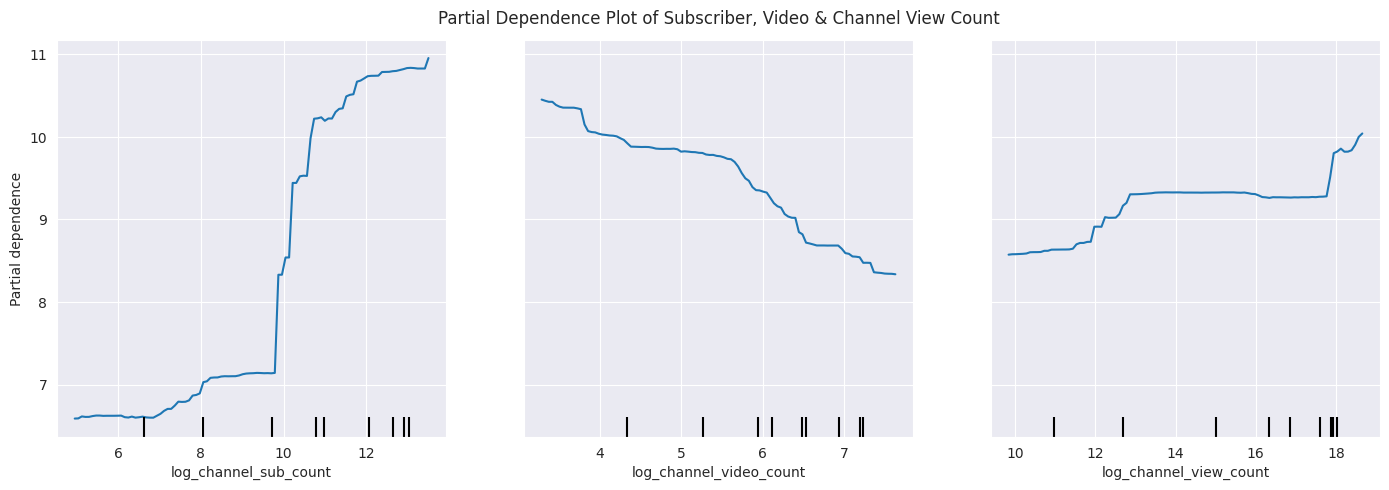

In [13]:
# visualize partial dependence for subscribers, video count & channel view count
fig, ax = plt.subplots(figsize=(14, 5))
PartialDependenceDisplay.from_estimator(estimator=pipeline, X=X_train, features=["log_channel_sub_count", "log_channel_video_count", "log_channel_view_count"], ax=ax, grid_resolution=100)
ax.set_title("Partial Dependence Plot of Subscriber, Video & Channel View Count", y=1.02)
plt.tight_layout()

# save png
plt.savefig("images/pdp_sub_video_channel_view_count.png", dpi=300)

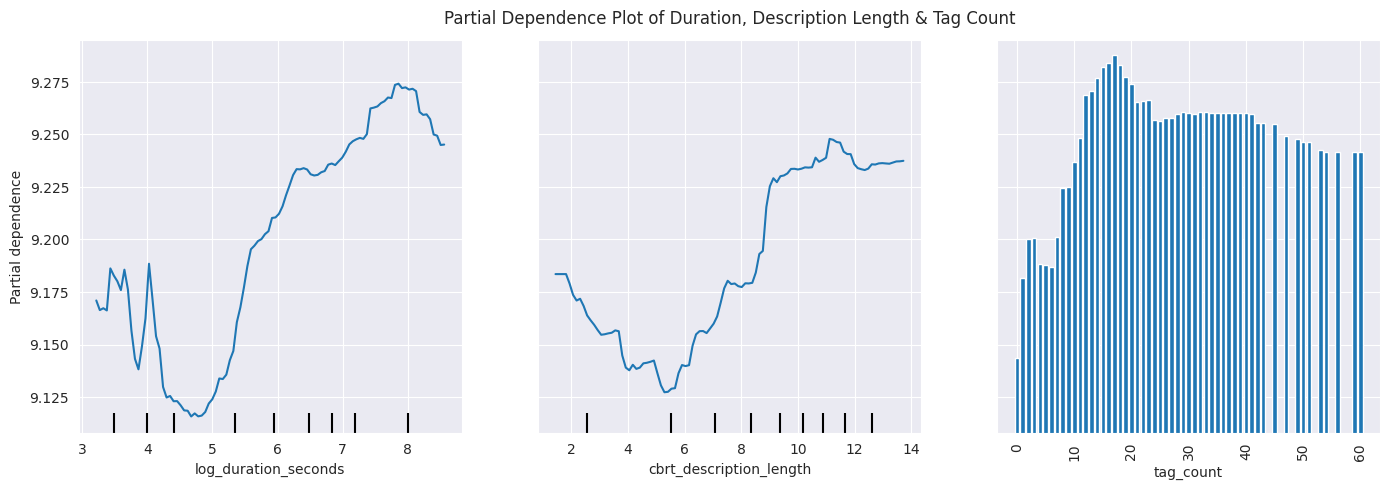

In [14]:
# visualize partial dependence for duration, description length & tag count
fig, ax = plt.subplots(figsize=(14, 5))
PartialDependenceDisplay.from_estimator(estimator=pipeline, X=X_train, features=["log_duration_seconds", "cbrt_description_length", "tag_count"], categorical_features=["tag_count"], ax=ax, grid_resolution=100)
ax.set_title("Partial Dependence Plot of Duration, Description Length & Tag Count", y=1.02)
plt.tight_layout()

# save fig
plt.savefig("images/pdp_duration_desc_length_tag_count.png", dpi=300)

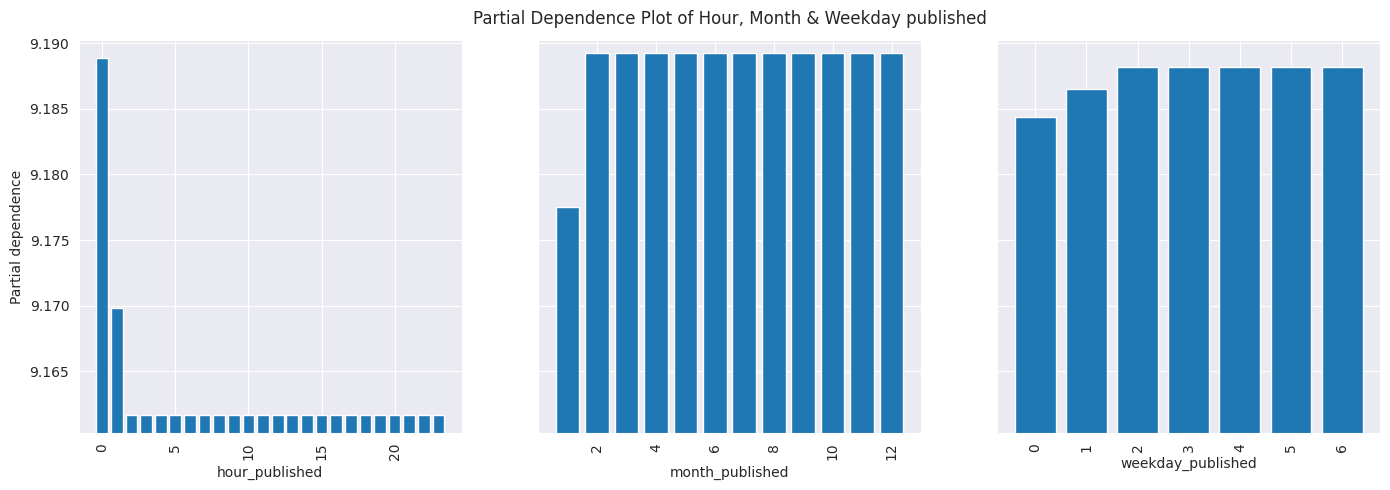

In [15]:
# visualize partial dependence for hour, month & weekday published
fig, ax = plt.subplots(figsize=(14, 5))
PartialDependenceDisplay.from_estimator(estimator=rf, X=X_train, features=["hour_published", "month_published", "weekday_published"], categorical_features=["hour_published", "month_published", "weekday_published"], ax=ax, grid_resolution=100)
ax.set_title("Partial Dependence Plot of Hour, Month & Weekday published", y=1.02)
plt.tight_layout()

# save png
plt.savefig("images/pdp_hour_month_weekday_pub.png", dpi=300)

In [16]:
# get the shap values of each feature
scaler = pipeline.named_steps["standardscaler"]
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
explainer = shap.TreeExplainer(rf)
shap_values = pd.DataFrame(explainer.shap_values(X_train_scaled), columns=X_train.columns)
shap_values.head()


,caption,hour_published,weekday_published,month_published,hd,cat_Comedy,cat_Education,cat_Entertainment,cat_Film & Animation,cat_Gaming,...,term_www,term_year,term_years,term_youtu,term_youtube,log_channel_view_count,log_channel_sub_count,log_channel_video_count,log_duration_seconds,cbrt_description_length
0,-0.003321,0.007770,0.008238,-0.000299,-0.000451,-0.000034,0.009197,-0.000456,0.000005,0.0,...,0.013744,0.001279,0.000488,0.002839,0.011970,-0.118232,1.694261,-0.351361,0.084751,0.057008
1,-0.003942,0.019861,0.001014,-0.027871,-0.020515,-0.000009,-0.005735,0.001315,0.000045,0.0,...,-0.006960,0.001326,-0.000195,-0.002234,-0.003296,-0.611039,-3.194336,0.323916,0.030574,-0.013196
2,-0.003129,0.011804,0.021437,0.010445,0.000150,-0.000017,-0.001167,0.004021,0.000084,0.0,...,-0.005946,0.002878,0.003114,-0.003704,0.005984,0.111919,0.691573,1.228023,0.186381,0.025900
3,-0.003819,0.008530,-0.006687,-0.010789,-0.000356,-0.000097,0.000242,0.000835,0.000011,0.0,...,0.006660,0.001177,0.000478,-0.004305,0.011215,-0.105409,1.707997,-0.427413,0.043585,-0.038123
4,-0.005754,-0.002403,-0.003217,0.017926,-0.000927,-0.000037,-0.000572,-0.000399,0.000003,0.0,...,0.004164,0.000889,0.000409,-0.005605,-0.000409,0.373296,1.691690,-0.492679,0.100849,0.062800


In [17]:
# list the top term features
terms = []
for col in feature_importances.index:
    if col.startswith("term_"):
        terms.append(col)
top_terms = terms[:20]
top_terms

['term_outreach',
 'term_music',
 'term_animal',
 'term_vegan',
 'term_animals',
 'term_liberation',
 'term_instagram',
 'term_veganism',
 'term_www',
 'term_com',
 'term_https',
 'term_facebook',
 'term_video',
 'term_products',
 'term_gains',
 'term_support',
 'term_wayne',
 'term_http',
 'term_youtube',
 'term_work']

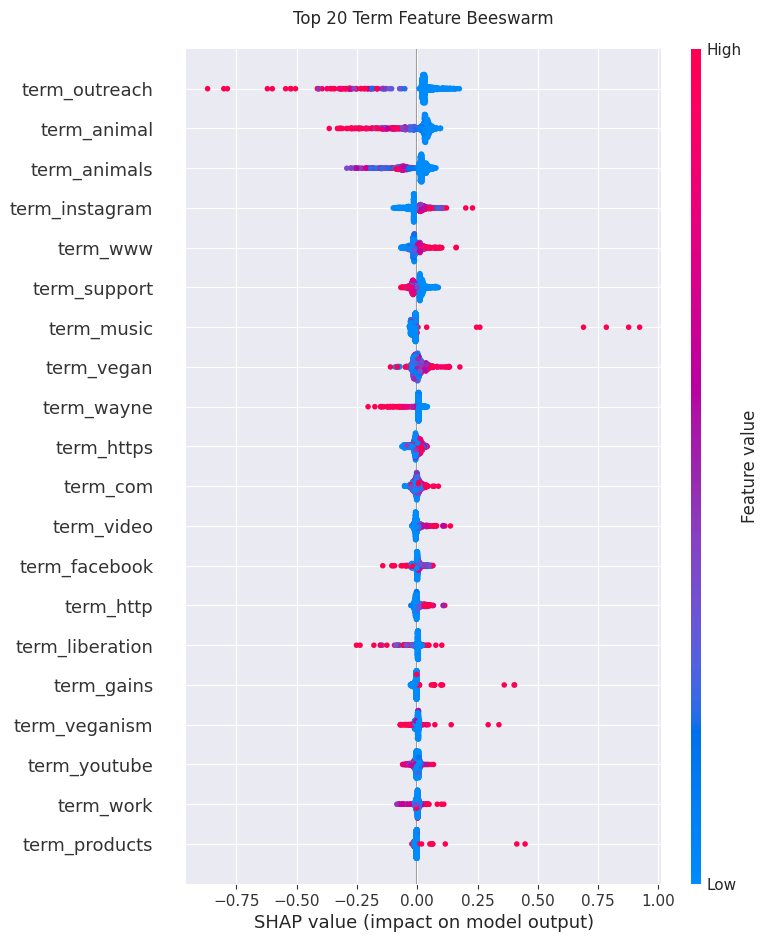

In [18]:
# visualize beeswarm of top 20 term features
plt.title("Top 20 Term Feature Beeswarm", y=1.02)
shap.summary_plot(shap_values[top_terms].values, X_train_scaled[top_terms], plot_type="dot", show=False)

# save png
plt.savefig("images/term_beeswarm.png", dpi=300)

In [19]:
# list the category features
categories = []
for col in feature_importances.index:
    if col.startswith("cat_"):
        categories.append(col)
categories

['cat_Science & Technology',
 'cat_Music',
 'cat_People & Blogs',
 'cat_Education',
 'cat_Nonprofits & Activism',
 'cat_Pets & Animals',
 'cat_Howto & Style',
 'cat_Entertainment',
 'cat_News & Politics',
 'cat_Comedy',
 'cat_Film & Animation',
 'cat_Travel & Events',
 'cat_Sports',
 'cat_Gaming']

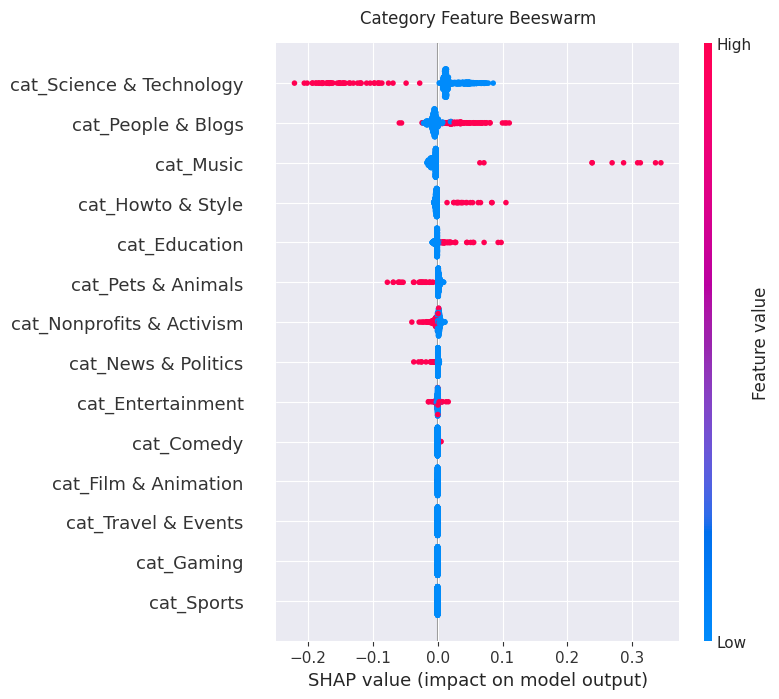

In [20]:
# visualize beeswarm of category features
plt.title("Category Feature Beeswarm", y=1.02)
shap.summary_plot(shap_values[categories].values, X_train_scaled[categories], plot_type="dot", show=False)
plt.tight_layout()

# save png
plt.savefig("images/category_beeswarm.png", dpi=300)

In [21]:
# convert log residuals to actual in video views and label with video and channel title
labels = pd.read_csv("data/videos_prepared.csv", usecols=[0, 1, 2, 335])
labled_residuals = pd.merge(labels, residuals, left_index=True, right_index=True).rename(columns={"log_view_count_x": "log_view_count", "log_view_count_y": "log_residual"})
labled_residuals["log_predicted"] = labled_residuals["log_view_count"] - labled_residuals["log_residual"]
labled_residuals["act_view_count"] = np.expm1(labled_residuals["log_view_count"])
labled_residuals["act_predicted"] = np.expm1(labled_residuals["log_predicted"]).round(2)
labled_residuals["act_residual"] = labled_residuals["act_view_count"] - labled_residuals["act_predicted"]
labled_residuals = labled_residuals.iloc[:, [0,1,2,3,5,4,6,7,8]].sort_values("act_residual", key=abs, ascending=False)
labled_residuals.head(10)

,video_id,title,channel_title,log_view_count,log_predicted,log_residual,act_view_count,act_predicted,act_residual
756,Z3u7hXpOm58,You Will Never Look at Your Life in the Same W...,Earthling Ed,15.536755,12.109774,3.426981,5591482.0,181637.54,5409844.46
792,dmq6ai-4o8Y,why I went plant-based,Tiff Loves Tofu,14.710419,12.055102,2.655317,2447111.0,171973.53,2275137.47
119,3g-KqNqFA9Y,"Forget hummus, make this instead",Rainbow Plant Life,14.807298,14.011680,0.795618,2696047.0,1216731.47,1479315.53
636,0VHK8wpFci4,The breakfast that helped me lose 40lbs as a v...,Chelsea Mae,14.132579,11.871233,2.261346,1373096.0,143089.58,1230006.42
17,G5o4ym5in_w,A Masterclass On Plant-Based Nutrition | Rich ...,Rich Roll,13.884312,11.901366,1.982945,1071222.0,147466.94,923755.06
555,uQCe4qEexjc,Philip Wollen : Animals Should Be Off The Menu...,Kindness Trust,13.742726,9.408119,4.334607,929800.0,12185.93,917614.07
72,wCyQFdIu1Bg,Joaquin Phoenix On Why He's Vegan,Brut India,13.765239,12.177598,1.587641,950970.0,194384.33,756585.67
199,TVb0wsUnSM8,Vegan Food: What Do You ACTUALLY Eat?,Gabrielle Reyes,13.531658,10.267744,3.263914,752877.0,28787.88,724089.12
826,WIkC4OJEx3c,Gary Yourofsky's Speech: Q&A Session,TheAnimalHolocaust,13.404263,11.119601,2.284662,662822.0,67480.00,595342.00
472,bi1cfkksehM,Think From The Victim's Perspective #vegan #an...,Arvind Animal Activist,13.733994,12.717965,1.016029,921716.0,333688.10,588027.90


In [22]:
# scale test features and get shap values
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)
shap_values = pd.DataFrame(explainer.shap_values(X_test_scaled), columns=X_test.columns, index=X_test.index)
shap_values.head()

,caption,hour_published,weekday_published,month_published,hd,cat_Comedy,cat_Education,cat_Entertainment,cat_Film & Animation,cat_Gaming,...,term_www,term_year,term_years,term_youtu,term_youtube,log_channel_view_count,log_channel_sub_count,log_channel_video_count,log_duration_seconds,cbrt_description_length
757,-0.005394,0.000320,-0.009045,0.011690,-0.000120,-0.000013,-0.001247,0.000451,0.000103,0.0,...,0.000676,0.002198,0.002761,-0.005328,0.002663,-0.157867,1.581936,0.859544,0.024773,0.002061
607,-0.009496,0.033507,0.007634,-0.003533,0.001616,-0.000008,-0.002338,0.000513,0.000016,0.0,...,-0.008274,0.000851,0.000573,-0.002981,-0.004840,0.153976,-2.098026,0.280857,0.058820,0.022059
362,-0.012211,0.085734,0.008928,-0.013381,0.005862,-0.000011,-0.001850,-0.000051,-0.000004,0.0,...,0.002204,0.000823,-0.000438,-0.004737,-0.005154,0.441973,-1.610093,-0.324115,0.025135,0.015037
629,-0.004482,0.086421,-0.001576,0.002481,-0.003525,-0.000017,-0.003012,0.000409,0.000101,0.0,...,-0.014416,0.000978,0.001985,-0.002682,-0.002215,-0.104798,-2.498394,0.521236,0.006974,-0.048251
852,-0.003906,0.013462,0.002045,-0.001654,-0.000107,-0.000012,-0.000894,-0.001266,-0.000226,0.0,...,-0.018191,0.001836,0.002147,-0.009356,0.005892,-0.134633,1.260326,0.158910,-0.001365,0.004774


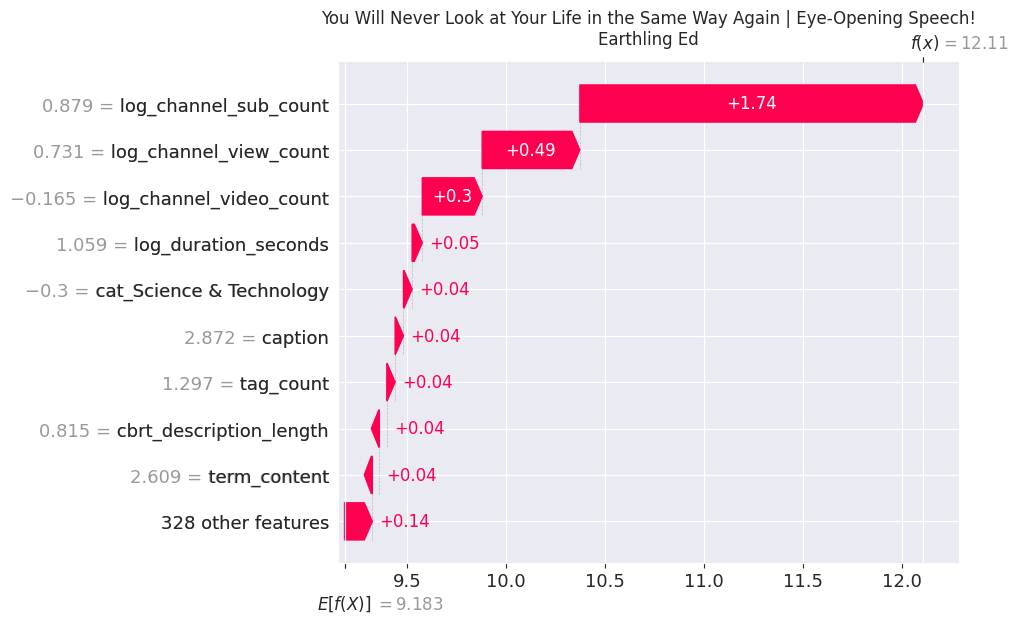

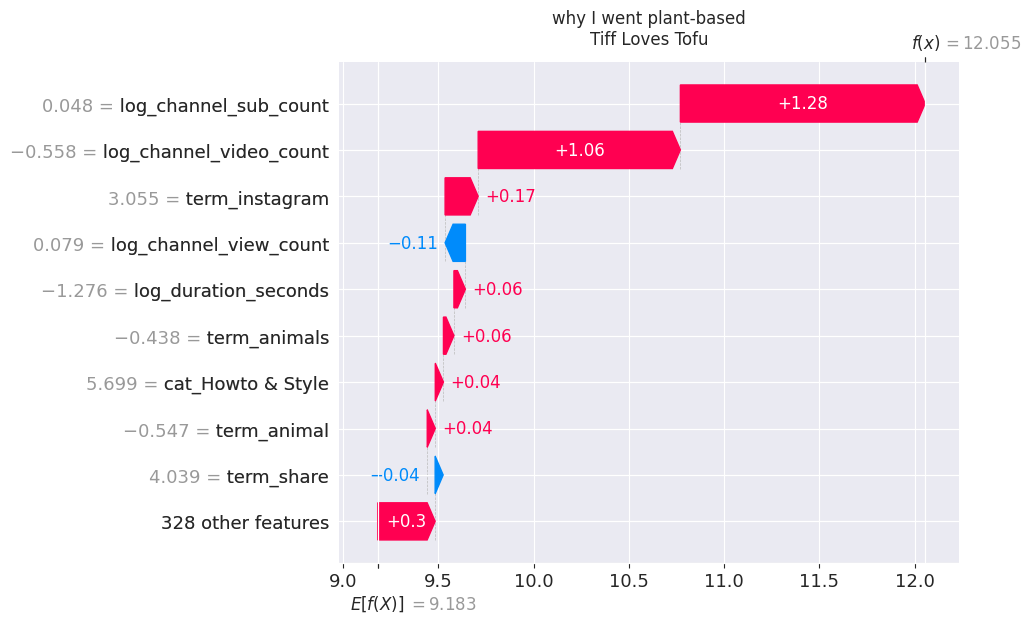

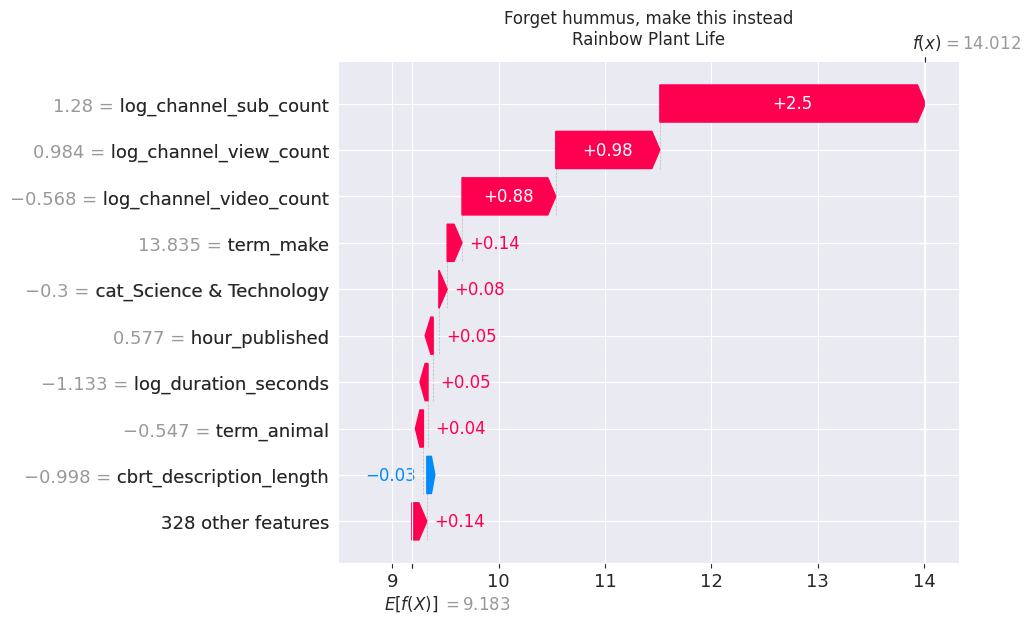

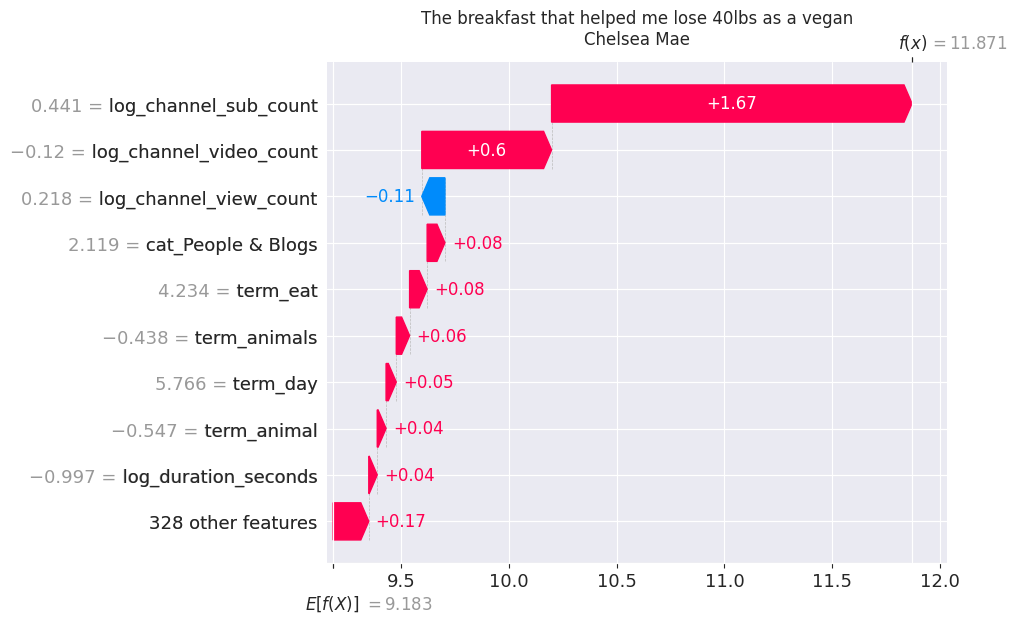

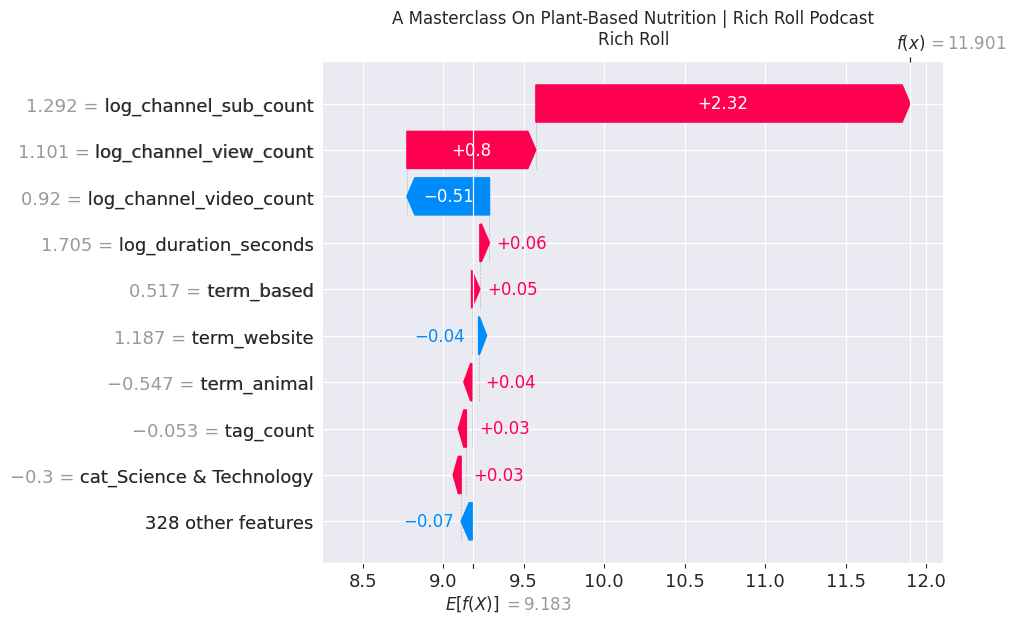

In [23]:
# visualize local shap for top 5 residuals
for i in labled_residuals.index[:5]:
    plt.title(f"{labled_residuals.loc[i]["title"]}\n{labled_residuals.loc[i]["channel_title"]}", y=1.02)
    shap.waterfall_plot(shap.Explanation(values=shap_values.loc[i].values, base_values=explainer.expected_value, data=X_test_scaled.loc[i].values, feature_names=X_test_scaled.columns), show=False)
    file = ("_").join(labled_residuals.loc[i]["channel_title"].lower().split(" "))

    # save png
    plt.savefig(f"images/local_shap/{file}.png", dpi=300, bbox_inches="tight")
    plt.show()

In [24]:
# sort residuals by most over predicted
labled_residuals_negative = labled_residuals.sort_values("act_residual").head()
labled_residuals_negative

,video_id,title,channel_title,log_view_count,log_predicted,log_residual,act_view_count,act_predicted,act_residual
460,HoPGzB0NMuA,Major Update! #vegan #animals #update #speaker...,Arvind Animal Activist,10.458120,12.690944,-2.232824,34825.0,324792.09,-289967.09
702,H4Y_icXdpV8,The Reality of Meat #truth #motivation #vegan ...,Arvind Animal Activist,10.435996,12.539477,-2.103481,34063.0,279141.32,-245078.32
354,STWUAUFsyKQ,"Why Eat ""Mock Meat""? #truth #motivation #vegan...",Arvind Animal Activist,10.819978,12.587756,-1.767778,50009.0,292948.66,-242939.66
389,Uw2FbUawACQ,What I Eat In A Day as a vegan food blogger! 🌮...,Carleigh Bodrug,13.436627,13.654472,-0.217845,684624.0,851258.14,-166634.14
524,Ud2UfUHZm4w,"Healthline: ""Detrimental"" Vitamin A Deficiency...",Mic the Vegan,11.182572,12.319382,-1.136809,71866.0,223994.60,-152128.60


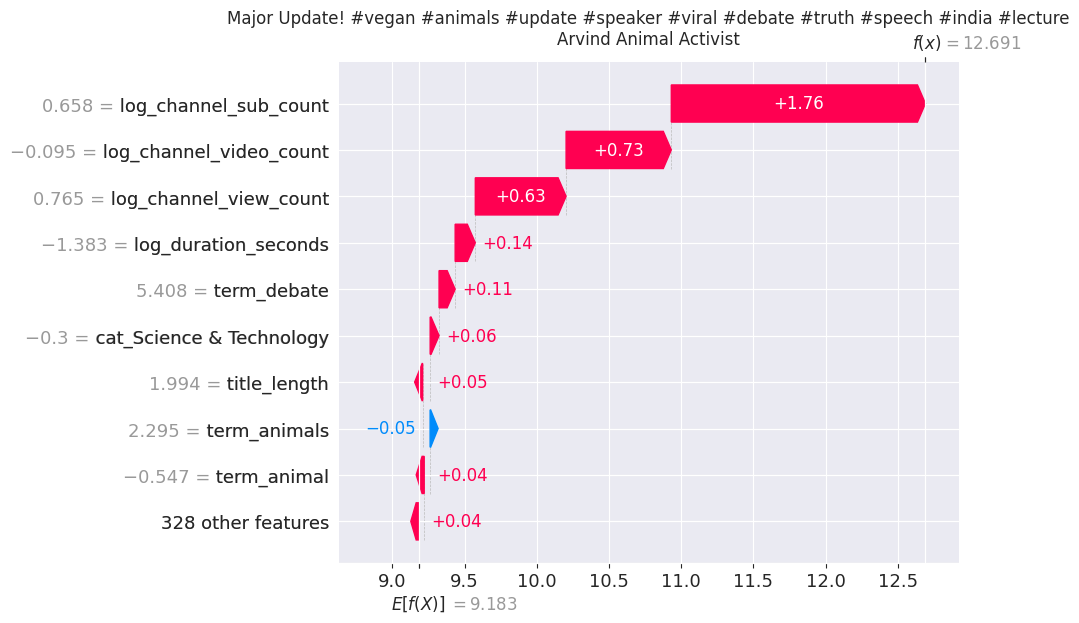

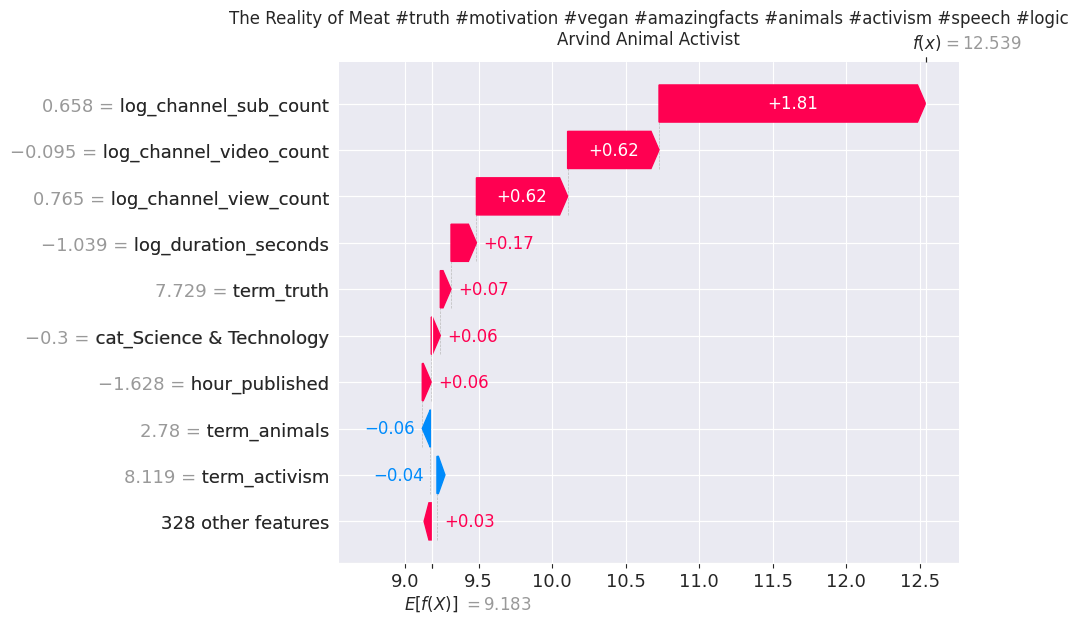

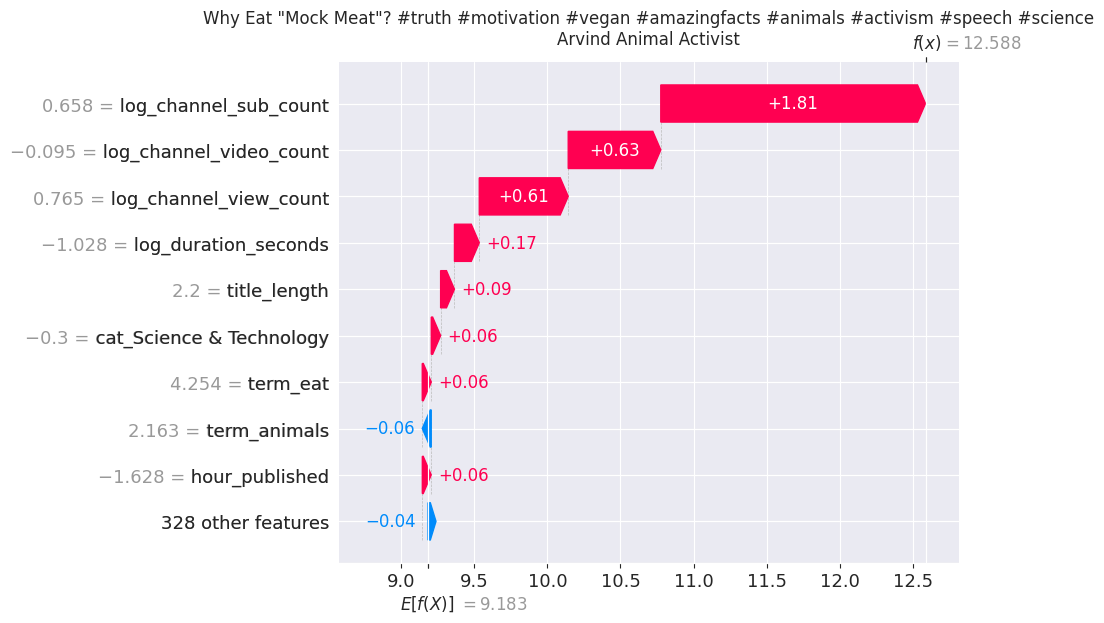

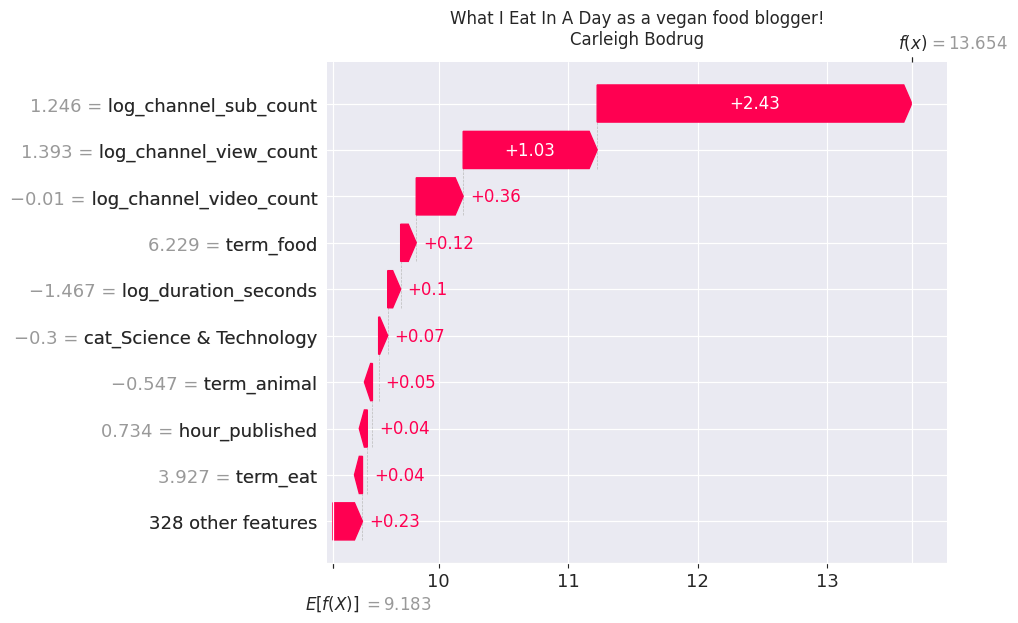

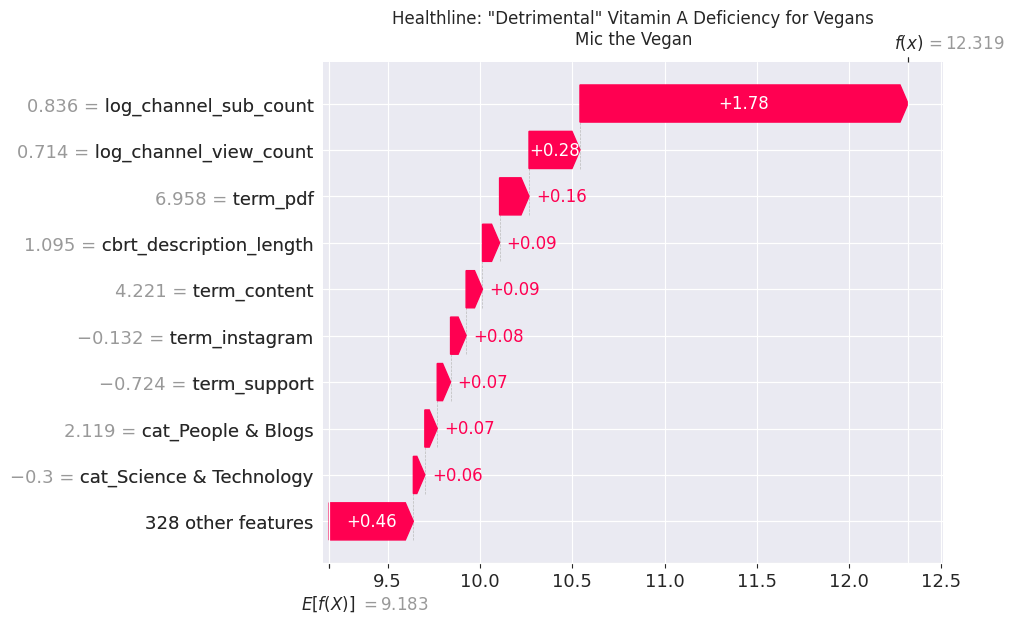

In [25]:
# visualize local shap for top 5 residuals
for i in labled_residuals_negative.index:
    title = labled_residuals.loc[i]["title"] if i != 389 else labled_residuals.loc[i]["title"][:44]
    plt.title(f"{title}\n{labled_residuals.loc[i]["channel_title"]}", y=1.02)
    shap.waterfall_plot(shap.Explanation(values=shap_values.loc[i].values, base_values=explainer.expected_value, data=X_test_scaled.loc[i].values, feature_names=X_test_scaled.columns), show=False)
    file = ("_").join(labled_residuals.loc[i]["channel_title"].lower().split(" "))

    # save png
    plt.savefig(f"images/local_shap/{file}_{i}.png", dpi=300, bbox_inches="tight")
    plt.show()

In [26]:
# sort residuals by highest predictions
highest_predicted = labled_residuals.sort_values("act_predicted", ascending=False).head()
highest_predicted

,video_id,title,channel_title,log_view_count,log_predicted,log_residual,act_view_count,act_predicted,act_residual
119,3g-KqNqFA9Y,"Forget hummus, make this instead",Rainbow Plant Life,14.807298,14.011680,0.795618,2696047.0,1216731.47,1479315.53
389,Uw2FbUawACQ,What I Eat In A Day as a vegan food blogger! 🌮...,Carleigh Bodrug,13.436627,13.654472,-0.217845,684624.0,851258.14,-166634.14
472,bi1cfkksehM,Think From The Victim's Perspective #vegan #an...,Arvind Animal Activist,13.733994,12.717965,1.016029,921716.0,333688.10,588027.90
460,HoPGzB0NMuA,Major Update! #vegan #animals #update #speaker...,Arvind Animal Activist,10.458120,12.690944,-2.232824,34825.0,324792.09,-289967.09
354,STWUAUFsyKQ,"Why Eat ""Mock Meat""? #truth #motivation #vegan...",Arvind Animal Activist,10.819978,12.587756,-1.767778,50009.0,292948.66,-242939.66


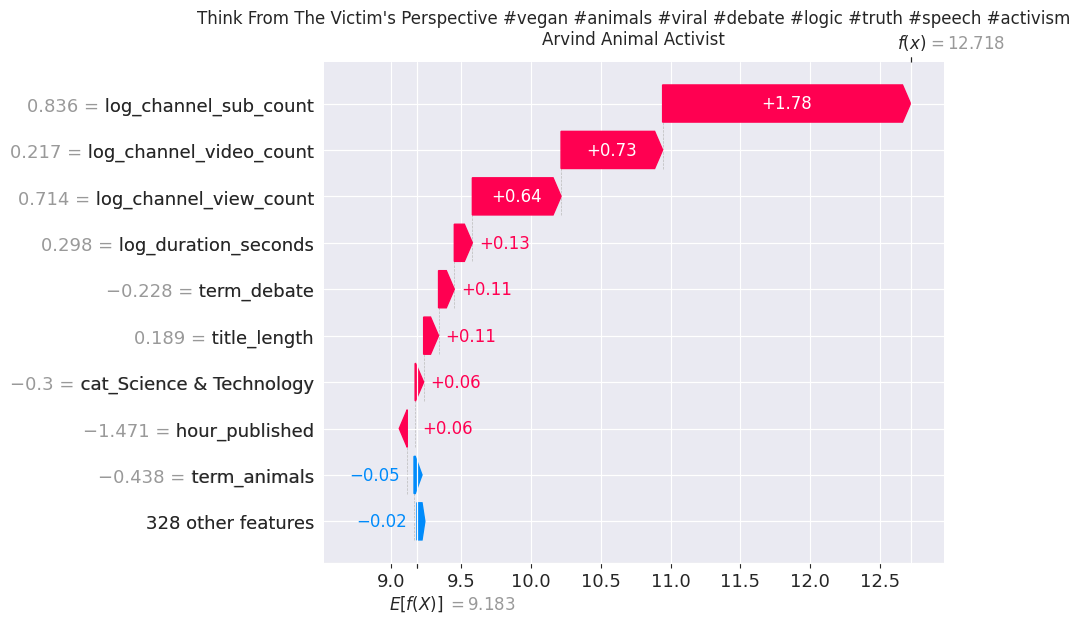

In [27]:
# visualize local shap for highest predictions
plt.title(f"{labled_residuals.loc[472]["title"]}\n{labled_residuals.loc[472]["channel_title"]}", y=1.02)
shap.waterfall_plot(shap.Explanation(values=shap_values.loc[472].values, base_values=explainer.expected_value, data=X_test_scaled.loc[i].values, feature_names=X_test_scaled.columns), show=False)
file = ("_").join(labled_residuals.loc[472]["channel_title"].lower().split(" "))

# save png
plt.savefig(f"images/local_shap/{file}_472.png", dpi=300, bbox_inches="tight")
plt.show()